```
        svd((repmat(sum(x.*x,1),size(x,1),1).*x)*x’);
[W,s,v]=svd((repmat(sum(x.*x,1),size(x,1),1).*x)*x');
```

In [2]:
import numpy as np
from numpy.matlib import repmat 
from scipy.linalg import svd
import pydub
from pydub import AudioSegment
from pydub.playback import play
import array
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
from scipy import linalg

```
[x1, Fs1] = audioread('mix1.wav');
[x2, Fs2] = audioread('mix2.wav');
xx = [x1, x2]';
yy = sqrtm(inv(cov(xx')))*(xx-repmat(mean(xx,2),1,size(xx,2)));
[W,s,v] = svd((repmat(sum(yy.*yy,1),size(yy,1),1).*yy)*yy');

a = W*xx; %W is unmixing matrix
subplot(2,2,1); plot(x1); title('mixed audio - mic 1');
subplot(2,2,2); plot(x2); title('mixed audio - mic 2');
subplot(2,2,3); plot(a(1,:), 'g'); title('unmixed wave 1');
subplot(2,2,4); plot(a(2,:),'r'); title('unmixed wave 2');

audiowrite('unmixed1.wav', a(1,:), Fs1);
audiowrite('unmixed2.wav', a(2,:), Fs1);
```

In [7]:
data_dir = './medias/'
sample_rate, x1 = wavfile.read(data_dir + 'mix1.wav')
#x1 = x1[0:5000]
Audio(x1, rate=sample_rate)

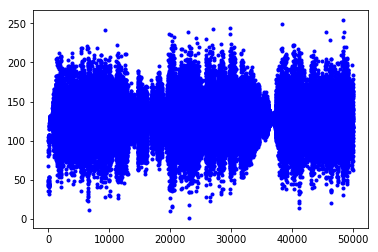

In [8]:
plt.plot(x1,'.b')
plt.show()

In [9]:

sample_rate, x2 = wavfile.read(data_dir + 'mix2.wav')
#x2 = x2[0:5000]
Audio(x2, rate=sample_rate)

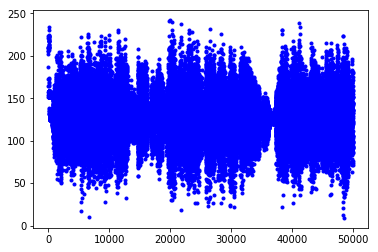

In [10]:
plt.plot(x2, '.b')
plt.show()

In [11]:
x1 = x1 / 255.0 - 0.5
x2 = x2 / 255.0 - 0.5

In [12]:
# Output information about the sound samples.
a = x1.shape
n = a[0]
print ("Number of samples: ", n)
n = n * 1.0

Number of samples:  50000


In [13]:
x = [x1, x2]

Text(0.5, 1.0, 'Original data')

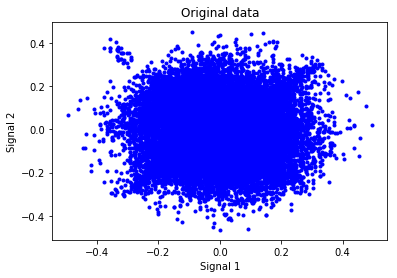

In [14]:
plt.figure()
plt.plot(x1, x2, '.b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")

```
yy = sqrtm(inv(cov(xx')))*(xx-repmat(mean(xx,2),1,size(xx,2)));
yy = linalg.sqrtm(linalg.inv(np.cov(np.transpose(xx))))
```


In [15]:
# Calculate the covariance matrix of the initial data.
cov = np.cov(x)
# Calculate eigenvalues and eigenvectors of the covariance matrix.
d, E = linalg.eigh(cov)
# Generate a diagonal matrix with the eigenvalues as diagonal elements.
D = np.diag(d)

Di = linalg.sqrtm(linalg.inv(D))
# Perform whitening. xn is the whitened matrix.
xn = np.dot(Di, np.dot(np.transpose(E), x))

Text(0.5, 1.0, 'Whitened data')

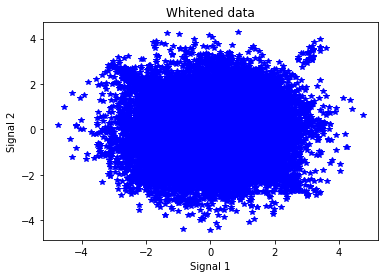

In [16]:
# Plot whitened data to show new structure of the data.
plt.figure()
plt.plot(xn[0], xn[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")

In [17]:
# Perform FOBI.
norm_xn = linalg.norm(xn, axis=0)
norm = [norm_xn, norm_xn]

cov2 = np.cov(np.multiply(norm, xn))

d_n, Y = linalg.eigh(cov2)

source = np.dot(np.transpose(Y), xn)

In [18]:
# Plot the separated sources.
time = np.arange(0, n, 1)
time = time / sample_rate
time = time * 1000  # convert to milliseconds

Text(0.5, 1.0, 'Generated signal 1')

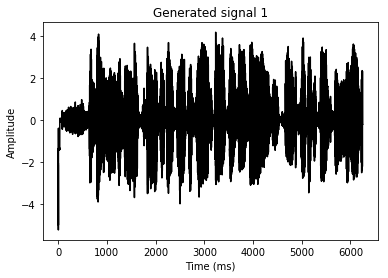

In [19]:
plt.figure()
plt.plot(time, source[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

In [20]:
Audio(source[0], rate=sample_rate)

Text(0.5, 1.0, 'Generated signal 2')

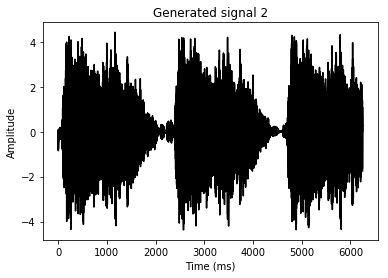

In [21]:
plt.figure()
plt.plot(time, source[1], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")

In [22]:
Audio(source[1], rate=sample_rate)